# **GLOBAL TERRORISM ANALYSIS**


## PART 3: DATA ANALYSIS AND VISUALISATION 
#### Author : Samarpan Das


---
---
#### This file contains analysis and vizualisation using Python, for viewing some more advanced analysis and visualizations refer to Global Terrorism Analysis Workbook @ my Tableau Public Profile
---

#**Tableau Public Workbook on** 
[Global Terrorism Analysis by Samarpan](https://public.tableau.com/profile/samarpan.das#!/)

##### Note : You wont have to create an account or sign in to view my workbook, but tableau does sometimes have server issues, so referesh the page a few times in case it doesn't open at once.














---
---


Importing necessary libraries

In [ ]:
import time
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from matplotlib import animation
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import plotly.express as px

Connecting drive to google colab

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
terror_df = pd.read_csv('/content/drive/My Drive/BaseForAnalysis_Version2.csv', sep=',', encoding="ISO-8859-1")


Glimpse of the final dataset that will be used to draw the analysis

In [ ]:
terror_df.head(10)

,Unnamed: 0,eventid,year,month,day,extended,country,region,city,latitude,longitude,vicinity,crit,multiple,success,suicide,attacktype,targettype,nationality,organisation,nperps,claimedresp,weapontype,nkilled,nkillonlyter,nwounded,propdamageextent,victimkidnapped,ransomdemanded,nreleased,ncasualties
0,0,197000000002,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,0,1,0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,7.0,NaN,Unknown,0.0,NaN,0.0,NaN,1.0,1.0,NaN,0.0
1,1,197001000001,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,0,1,0,1,0,Assassination,Journalists & Media,United States,Unknown,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0.0,0.0,NaN,1.0
2,2,197001000002,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,0,1,0,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,3,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,0,1,0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
4,4,197001010002,1970,1,1,0,United States,North America,Cairo,37.005105,-89.176269,0,1,0,1,0,Armed Assault,Police,United States,Black Nationalists,-99.0,0.0,Firearms,0.0,0.0,0.0,Minor,0.0,0.0,NaN,0.0
5,5,197001050001,1970,1,1,0,United States,North America,Baraboo,43.468500,-89.744299,0,1,0,0,0,Bombing/Explosion,Military,United States,"Weather Underground, Weathermen",NaN,NaN,Explosives,0.0,NaN,0.0,Minor,0.0,0.0,NaN,0.0
6,6,197001020001,1970,1,2,0,Uruguay,South America,Montevideo,-34.891151,-56.187214,0,1,0,0,0,Assassination,Police,Uruguay,Tupamaros (Uruguay),3.0,NaN,Firearms,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
7,7,197001020002,1970,1,2,0,United States,North America,Oakland,37.791927,-122.225906,0,1,0,1,0,Bombing/Explosion,Utilities,United States,Unknown,-99.0,0.0,Explosives,0.0,0.0,0.0,Minor,0.0,0.0,NaN,0.0
8,8,197001020003,1970,1,2,0,United States,North America,Madison,43.076592,-89.412488,0,1,0,1,0,Facility/Infrastructure Attack,Military,United States,New Year's Gang,1.0,1.0,Incendiary,0.0,0.0,0.0,Minor,0.0,0.0,NaN,0.0
9,9,197001030001,1970,1,3,0,United States,North America,Madison,43.072950,-89.386694,0,1,0,1,0,Facility/Infrastructure Attack,Government (General),United States,New Year's Gang,1.0,0.0,Incendiary,0.0,0.0,0.0,Minor,0.0,0.0,NaN,0.0


Cols involved

In [ ]:
terror_df.columns

Index(['Unnamed: 0', 'eventid', 'year', 'month', 'day', 'extended', 'country',
       'region', 'city', 'latitude', 'longitude', 'vicinity', 'crit',
       'multiple', 'success', 'suicide', 'attacktype', 'targettype',
       'nationality', 'organisation', 'nperps', 'claimedresp', 'weapontype',
       'nkilled', 'nkillonlyter', 'nwounded', 'propdamageextent',
       'victimkidnapped', 'ransomdemanded', 'nreleased', 'ncasualties'],
      dtype='object')

Analysis of the numerical figures in the data frame

In [ ]:
terror_df[['nkilled', 'nkillonlyter', 'nwounded', 'propdamageextent', 
        'ncasualties']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
nkilled,189233.0,2.411044,11.252288,0.0,0.0,0.0,2.0,1570.0
nkillonlyter,133316.0,0.536845,4.258953,0.0,0.0,0.0,0.0,500.0
nwounded,182259.0,3.126007,41.728920,0.0,0.0,0.0,2.0,10878.0
ncasualties,181582.0,5.259761,47.631602,0.0,0.0,1.0,4.0,12263.0


In [ ]:
terror_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        201183 non-null  int64  
 1   eventid           201183 non-null  int64  
 2   year              201183 non-null  int64  
 3   month             201183 non-null  int64  
 4   day               201183 non-null  int64  
 5   extended          201183 non-null  int64  
 6   country           201183 non-null  object 
 7   region            201183 non-null  object 
 8   city              200757 non-null  object 
 9   latitude          196556 non-null  float64
 10  longitude         196555 non-null  float64
 11  vicinity          201183 non-null  int64  
 12  crit              201183 non-null  int64  
 13  multiple          201183 non-null  int64  
 14  success           201183 non-null  int64  
 15  suicide           201183 non-null  int64  
 16  attacktype        20

.....


....


Analysis of the number of attacks per year 

Text(0.5, 1.0, 'Number of Terrorist Attack by Year')

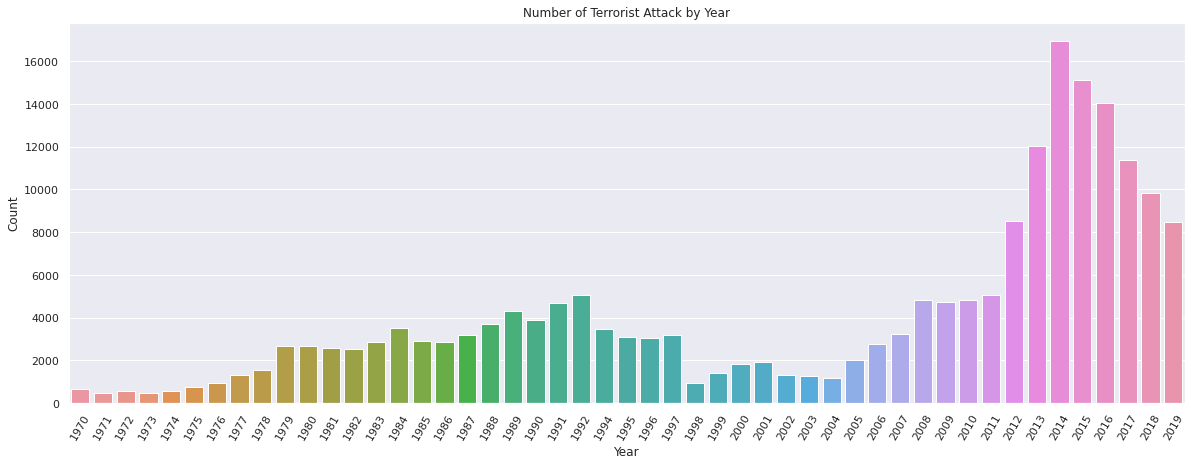

In [ ]:
f = plt.figure(figsize=(20, 7))

sns.set(font_scale = 1.1)
sns.set_theme(style = "darkgrid")
xaxis = sns.countplot(x = 'year', data = terror_df)
xaxis.set_xticklabels(xaxis.get_xticklabels(), rotation=60)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Number of Terrorist Attack by Year', fontsize = 12)

........

........

Number of Attacks per Region (The globe has been divided into 12 distinct regions as per global standards)

Text(0.5, 1.0, 'Number of Terrorist Attack by Region')

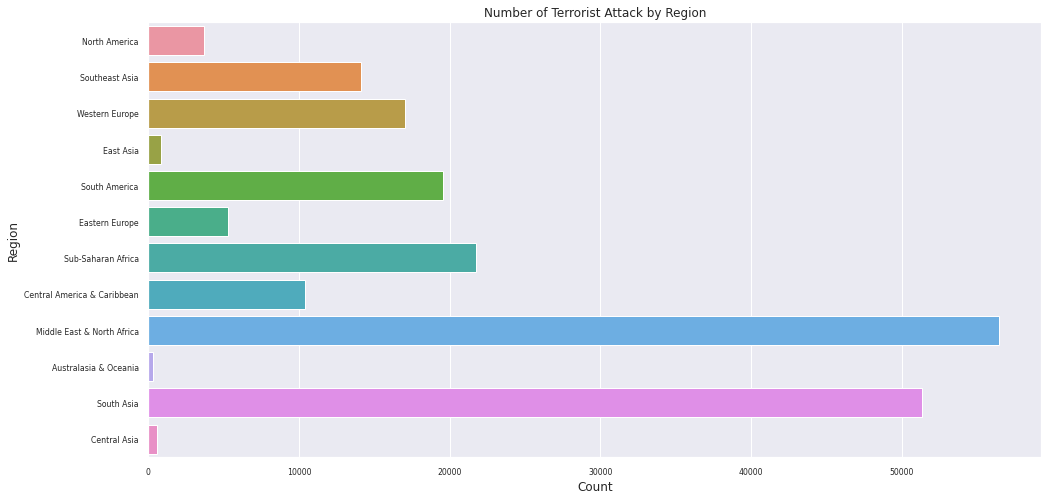

In [ ]:
f = plt.figure(figsize=(16, 8))

sns.set(font_scale=0.7)
sns.countplot(y='region', data=terror_df)
plt.ylabel('Region', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.title('Number of Terrorist Attack by Region', fontsize=12)

Number of Attacks per Attack Method

Text(0.5, 1.0, 'Types of Terrorist Attack ')

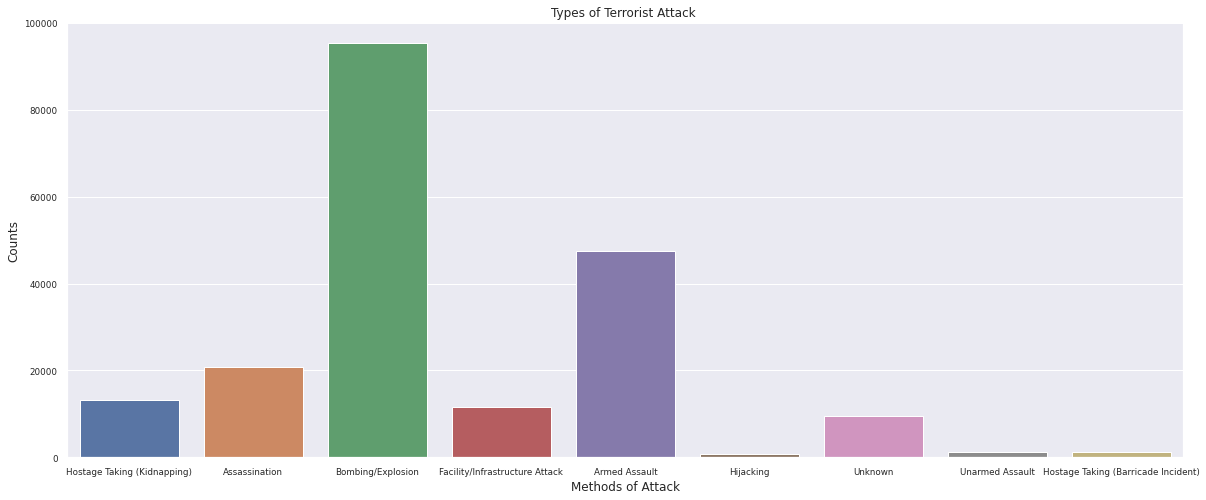

In [ ]:
f = plt.figure(figsize=(20, 8))

sns.set(font_scale=0.8)
sns.countplot(x='attacktype', data=terror_df,)
plt.xlabel('Methods of Attack', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Types of Terrorist Attack ', fontsize=12)

Number of Attacks per Type of Targets

Text(0.5, 1.0, 'Types of Target')

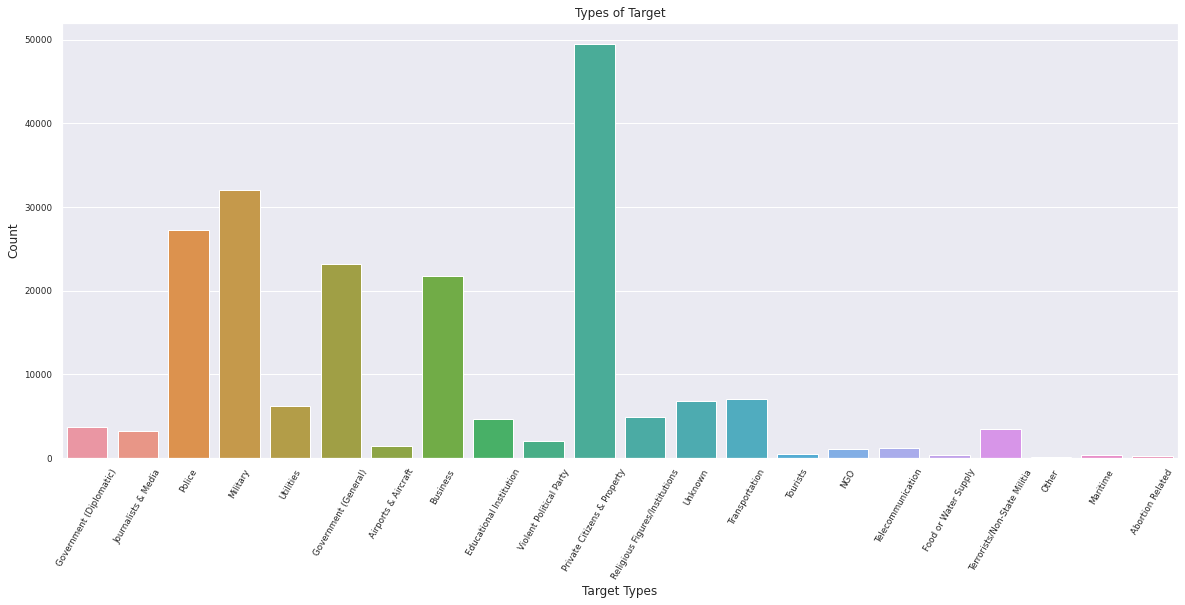

In [ ]:
f = plt.figure(figsize=(20, 8))

sns.set(font_scale=0.8)
xaxis = sns.countplot(x='targettype', data=terror_df,)

xaxis.set_xticklabels(xaxis.get_xticklabels(), rotation=60)
plt.xlabel('Target Types', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Types of Target', fontsize=12)

Top 15 Contries with most number of Attacks by terror groups

Text(0.5, 1.0, 'Top 15 Countries: Most Attacks by Terrorist Groups')

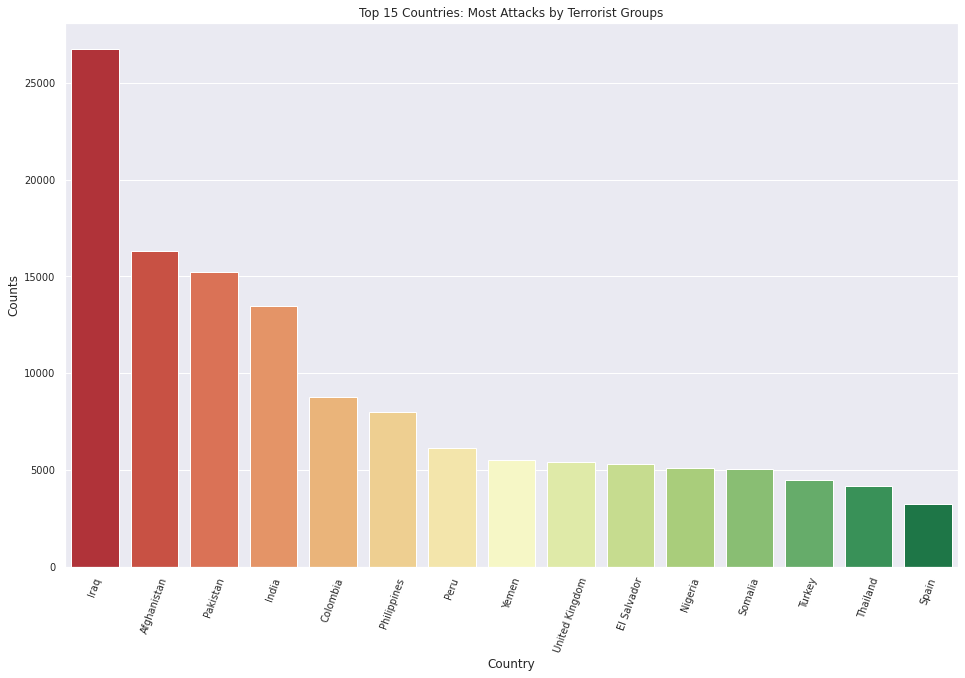

In [ ]:
fig= plt.figure(figsize=(16, 10))
sns.set(font_scale=0.9)
terror_country = sns.barplot(x=terror_df['country'].value_counts()[0:15].index, y=terror_df['country'].value_counts()[0:15], palette='RdYlGn')
terror_country.set_xticklabels(terror_country.get_xticklabels(), rotation=70)
terror_country.set_xlabel('Country', fontsize=12)
terror_country.set_ylabel('Counts', fontsize=12)
plt.title('Top 15 Countries: Most Attacks by Terrorist Groups', fontsize=12)

......

.............

........

.......

Analysis of number of attacks in a region on a particular calender year


This helps us compare the rise / fall of attacks on a region

In [ ]:
region_year = pd.crosstab(terror_df.year, terror_df.region)

region_year.head(20)

region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317
1975,0,9,0,12,0,44,159,55,4,7,12,438
1976,0,45,0,2,0,55,125,91,4,12,11,578
1977,0,24,0,4,2,211,149,119,2,8,29,771
1978,2,199,0,35,2,128,117,222,2,44,46,729


Text(0.5, 1.0, 'Number of Attacks per Region by Year')

<Figure size 1152x720 with 0 Axes>

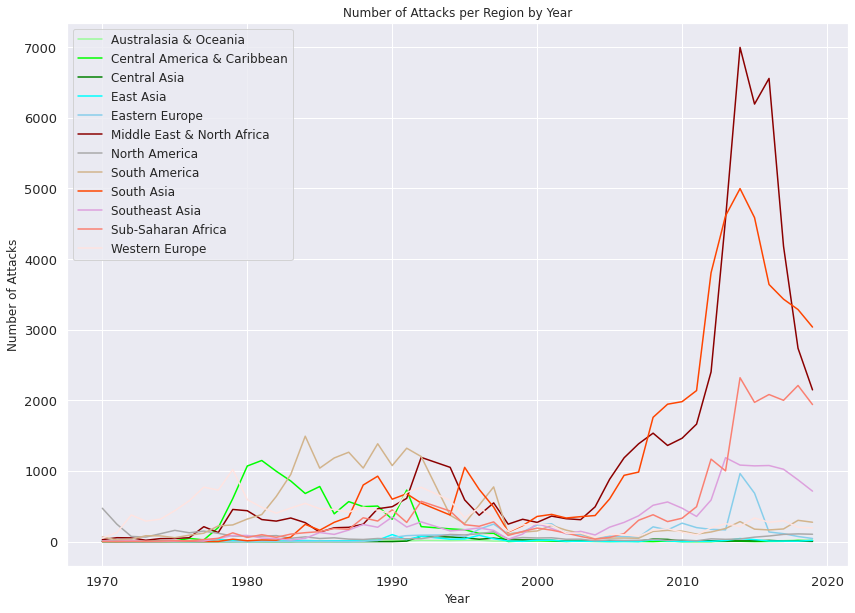

In [ ]:
fig = plt.figure(figsize=(16, 10))

color_list_reg_yr = ['palegreen', 'lime', 'green', 'Aqua', 'skyblue', 'darkred', 'darkgray', 'tan', 
                    'orangered', 'plum', 'salmon', 'mistyrose']
region_year.plot(figsize=(14, 10), fontsize=13, color=color_list_reg_yr)
#region_year.plot(figsize=(14, 10), fontsize=13)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.legend(fontsize=12)
plt.title('Number of Attacks per Region by Year', fontsize=12)

.....

Analysis of number of attacks of a particular type on a particular calender year


This helps us compare the rise / fall of attack types over the years

In [ ]:
attacktype_year = pd.crosstab(terror_df.year, terror_df.attacktype)

attacktype_year.head(20)

attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
year,,,,,,,,,
1970,61,22,333,174,11,3,38,3,6
1971,44,70,239,88,6,1,20,0,3
1972,63,265,188,19,12,4,16,0,1
1973,62,164,149,36,8,7,43,3,1
1974,46,158,285,42,3,5,37,4,1
1975,81,181,370,64,1,13,27,0,3
1976,124,204,419,113,4,6,45,3,5
1977,254,146,635,182,7,14,67,0,14
1978,241,263,644,181,0,43,97,5,52


.......

Analysis of number of attacks using a particular class of weapons on a particular calender year


This helps us compare the rise / fall of preferred weapon types for attacks

Text(0.5, 1.0, 'Weapon trends by Year')

<Figure size 1152x720 with 0 Axes>

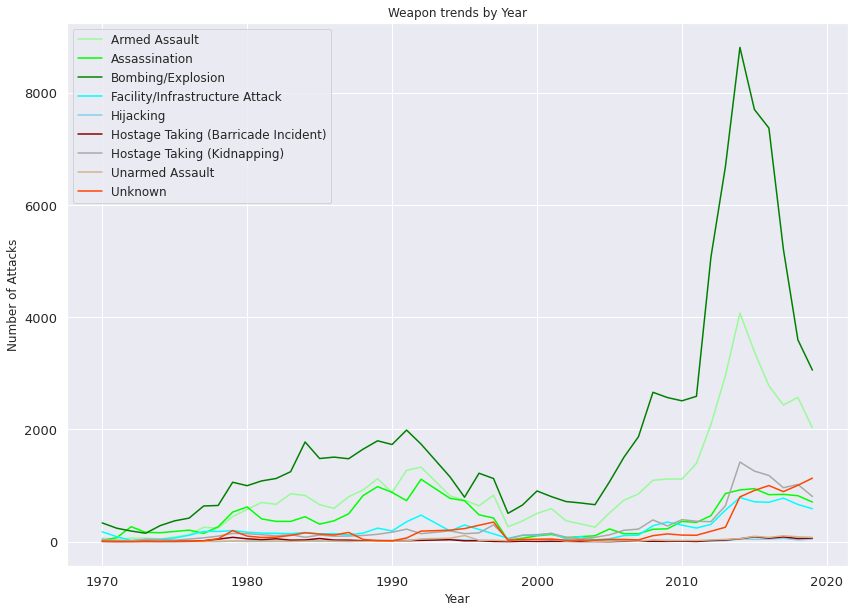

In [ ]:
fig = plt.figure(figsize=(16, 10))

color_list_reg_yr = ['palegreen', 'lime', 'green', 'Aqua', 'skyblue', 'darkred', 'darkgray', 'tan', 
                    'orangered', 'plum', 'salmon', 'mistyrose']
attacktype_year.plot(figsize=(14, 10), fontsize=13, color=color_list_reg_yr)
#region_year.plot(figsize=(14, 10), fontsize=13)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.legend(fontsize=12)
plt.title('Weapon trends by Year', fontsize=12)

In [ ]:
organisation_year = pd.crosstab(terror_df.year, terror_df.organisation)

organisation_year.head(20)


organisation,1 May,14 K Triad,14 March Coalition,14th of December Command,15th of September Liberation Legion,16 January Organization for the Liberation of Tripoli,1920 Revolution Brigades,19th of July Christian Resistance Brigade,1st of May Group,2 April Group,20 December Movement (M-20),22 May 1948,23 May Democratic Alliance (Algeria),23rd of September Communist League,28 February Armed Group,28 May Armenian Organization,28s,28th of December Group,2nd of June Movement,31 January People's Front (FP-31),313 Brigade (Syria),4 August National Organization,7 April Libyan Organization,9 February,9 May People's Liberation Force,A Resistance Group,A'chik Matgrik Elite Force (AMEF),AFB,AGEL,ATALA,Aba Cheali Group,Abbala extremists,Abd al-Krim Commandos,Abdul Ghani Kikli Militia,Abdul Qader Husseini Battalions of the Free Palestine movement,Abdullah Azzam Brigades,Abida Tribe,Abkhazian Separatists,Abkhazian guerrillas,Abstentionist Brigades,...,Young Cuba,Young Liberators of Pattani,Young Officer Union of the New Generation and Reformist Armed Forces of the Philippines (YOU-RAFP),Young Pioneers,Youth Action Group,Youth Gang,Youth Movement for the Total Liberation of Azawad,Youth for Revolution,Youth of Islamic Awakening,Youth of the Land of Egypt,Youth of the Star,Youths,Youths of Ali Movement,Zaghawa extremists,Zagros Eagles,Zairian Dissidents,Zapatista National Liberation Army,Zarate Willka Armed Forces of Liberation,Zawiya Martyrs Brigade,Zebra killers,Zehri Youth Force (ZYF),Zeliangrong United Front,Zemun Clan,Zero Point,Zero Tolerance,Zetas,Zimbabwe African Nationalist Union (ZANU),Zimbabwe African People's Union,Zimbabwe Guerrillas,Zimbabwe Patriotic Front,Zimbabwe People's Army (ZIPA),Zintani Militia,Zionist Resistance Fighters,Zomi Revolutionary Army (ZRA),Zulu Militants,Zulu Miners,Zuwar al-Imam Rida,Zviadists,Zwai Tribe,leftist guerrillas-Bolivarian militia
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1971,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1972,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1973,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1974,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1975,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1976,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1977,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1978,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,4,1,1,0,0,0,0,0,0,0,0,0


..........

---

## For Additional Analysis insights, refer to 
#**Tableau Public Workbook on** [Global Terrorism Analysis by Samarpan](https://public.tableau.com/profile/samarpan.das#!/)

##### Note : You wont have to create an account or sign in to view my workbook, but tableau does sometimes have server issues, so referesh the web-page a few times in case it doesn't open at once.

---
---